## Preprocessing

In [1]:
from preprocessing.pan21 import read_dataset

path = './data/pan21/train/en'

In [2]:
data = read_dataset(path)

In [3]:
data.keys()    # labels

dict_keys([0, 1])

In [4]:
len(data[0]), len(data[0][0])    # (num_users_in_a_label, num_tweets_per_user)

(100, 200)

## Stats

In [5]:
from eda.get_stats import *
from eda.get_per_user_stats import *

In [6]:
hashtags = count_hashtags(data)
urls = count_urls(data)
users = count_users(data)
rt = count_rt(data)


# print out
print('#HASHTAG#:', hashtags)
print('#URL#:', urls)
print('#USER#:', users)
print('##RT##:', rt)

#HASHTAG#: {0: 3757, 1: 3392}
#URL#: {0: 8571, 1: 6768}
#USER#: {0: 9723, 1: 11571}
##RT##: {0: 7633, 1: 6090}


In [7]:
uppercase_chars = count_uppercase_chars(data)
min_chars = count_min_chars(data)
avg_min_chars = count_avg_min_chars(data)
max_chars = count_max_chars(data)
avg_max_chars = count_avg_max_chars(data)
chars = count_chars(data)

# print out
print('number of upper-case characters:', uppercase_chars)
print('min min characters:', min_chars)
print('avg min characters:', avg_min_chars)
print('max max characters:', max_chars)
print('avg max characters:', avg_max_chars)
print('number of characters:', chars)

number of upper-case characters: {0: 71025, 1: 75867}
min min characters: {0: 4, 1: 5}
avg min characters: {0: 10.28, 1: 10.55}
max max characters: {0: 143, 1: 148}
avg max characters: {0: 125.08, 1: 128.2}
number of characters: {0: 1109779, 1: 1134313}


In [8]:
uppercase_words = count_uppercase_words(data)
min_words = count_min_words(data)
avg_min_words = count_avg_min_words(data)
max_words = count_max_words(data)
avg_max_words = count_avg_max_words(data)
words = count_words(data)

# print out
print('number of upper-case words:', uppercase_words)
print('min min words:', min_words)
print('avg min words:', avg_min_words)
print('max max words:', max_words)
print('avg max words:', avg_max_words)
print('number of words:', words)

number of upper-case words: {0: 43584, 1: 44012}
min min words: {0: 1, 1: 1}
avg min words: {0: 2.53, 1: 2.68}
max max words: {0: 31, 1: 32}
avg max words: {0: 24.85, 1: 25.58}
number of words: {0: 207317, 1: 213744}


In [9]:
# include #HASHTAG#, #URL#, #USER#
# not same as count_uppercase_words() + count(#HASHTAG#, #URL#, #USER#)
# not all #...# are followed by space. e.g., #USER#_Daily

min_words_alt = count_min_words_alt(data)
avg_min_words_alt = count_avg_min_words_alt(data)
max_words_alt = count_max_words_alt(data)
avg_max_words_alt = count_avg_max_words_alt(data)
words_alt = count_words_alt(data)

# print out
print('min min words (alt):', min_words_alt)
print('avg min words (alt):', avg_min_words_alt)
print('max max words (alt):', max_words_alt)
print('avg max words (alt):', avg_max_words_alt)
print('number of words (alt):', words_alt)

min min words (alt): {0: 1, 1: 2}
avg min words (alt): {0: 3.29, 1: 3.5}
max max words (alt): {0: 32, 1: 32}
avg max words (alt): {0: 25.37, 1: 26.07}
number of words (alt): {0: 228644, 1: 234867}


In [10]:
stop_words = count_stopwords(data)

# print out
print('number of stop-words:', stop_words)

## just split: number of stop-words: {0: 95998, 1: 101886}

number of stop-words: {0: 95998, 1: 101886}


In [11]:
emojis = count_emojis(data)

# print out
print('number of emojis:', emojis)

number of emojis: {0: 8792, 1: 7446}


In [12]:
sentiments = get_sentiments(data)

# print out
print('sentiment:', sentiments)

sentiment: {'positive': {0: 6385, 1: 6163}, 'negative': {0: 3679, 1: 4482}, 'neutral': {0: 9936, 1: 9355}}


In [13]:
ner1 = get_named_entities(data, corpora='en_core_web_sm')
ner2 = get_named_entities(data, corpora='xx_ent_wiki_sm')

# print out
print('ner1', ner1)
print()
print('ner2', ner2)

100%|█████████████████████████████████████████| 100/100 [03:15<00:00,  1.95s/it]


{'MONEY', 'CARDINAL', 'WORK_OF_ART', 'LAW', 'FAC', 'PRODUCT', 'NORP', 'TIME', 'LANGUAGE', 'DATE', 'QUANTITY', 'ORDINAL', 'PERCENT', 'EVENT'}


100%|█████████████████████████████████████████| 100/100 [01:44<00:00,  1.04s/it]


set()
ner1 {'PERSON': {0: 3809, 1: 3695}, 'PER': {0: 0, 1: 0}, 'ORG': {0: 4586, 1: 4226}, 'GPE': {0: 1966, 1: 1839}, 'LOC': {0: 106, 1: 98}, 'MISC': {0: 30469, 1: 27709}}

ner2 {'PERSON': {0: 0, 1: 0}, 'PER': {0: 4672, 1: 4743}, 'ORG': {0: 2611, 1: 2387}, 'GPE': {0: 0, 1: 0}, 'LOC': {0: 2437, 1: 2132}, 'MISC': {0: 6458, 1: 6534}}


## Per user stats

In [14]:
per_user_hashtags = count_per_user_hashtags(data)
per_user_urls = count_per_user_urls(data)
per_user_users = count_per_user_users(data)
per_user_rt = count_per_user_rt(data)

assert {label: sum(v) for label, v in per_user_hashtags.items()} == hashtags
assert {label: sum(v) for label, v in per_user_urls.items()} == urls
assert {label: sum(v) for label, v in per_user_users.items()} == users
assert {label: sum(v) for label, v in per_user_rt.items()} == rt

In [15]:
per_user_uppercase_chars = count_per_user_uppercase_chars(data)
per_user_min_chars = count_per_user_min_chars(data)
per_user_max_chars = count_per_user_max_chars(data)
per_user_chars = count_per_user_chars(data)

assert {label: sum(v) for label, v in per_user_uppercase_chars.items()} == uppercase_chars
assert {label: min(v) for label, v in per_user_min_chars.items()} == min_chars
assert {label: sum(v)/len(v) for label, v in per_user_min_chars.items()} == avg_min_chars
assert {label: max(v) for label, v in per_user_max_chars.items()} == max_chars
assert {label: sum(v)/len(v) for label, v in per_user_max_chars.items()} == avg_max_chars
assert {label: sum(v) for label, v in per_user_chars.items()} == chars

In [16]:
per_user_uppercase_words = count_per_user_uppercase_words(data)
per_user_min_words = count_per_user_min_words(data)
per_user_max_words = count_per_user_max_words(data)
per_user_words = count_per_user_words(data)

assert {label: sum(v) for label, v in per_user_uppercase_words.items()} == uppercase_words
assert {label: min(v) for label, v in per_user_min_words.items()} == min_words
assert {label: sum(v)/len(v) for label, v in per_user_min_words.items()} == avg_min_words
assert {label: max(v) for label, v in per_user_max_words.items()} == max_words
assert {label: sum(v)/len(v) for label, v in per_user_max_words.items()} == avg_max_words
assert {label: sum(v) for label, v in per_user_words.items()} == words

In [17]:
per_user_min_words_alt = count_per_user_min_words_alt(data)
per_user_max_words_alt = count_per_user_max_words_alt(data)
per_user_words_alt = count_per_user_words_alt(data)

assert {label: min(v) for label, v in per_user_min_words_alt.items()} == min_words_alt
assert {label: sum(v)/len(v) for label, v in per_user_min_words_alt.items()} == avg_min_words_alt
assert {label: max(v) for label, v in per_user_max_words_alt.items()} == max_words_alt
assert {label: sum(v)/len(v) for label, v in per_user_max_words_alt.items()} == avg_max_words_alt
assert {label: sum(v) for label, v in per_user_words_alt.items()} == words_alt

In [18]:
per_user_stopwords = count_per_user_stopwords(data)

assert {label: sum(v) for label, v in per_user_stopwords.items()} == stop_words

In [19]:
per_user_emojis = count_per_user_emojis(data)

assert {label: sum(v) for label, v in per_user_emojis.items()} == emojis

In [20]:
per_user_sentiments = get_per_user_sentiments(data)

for sentiment_type, sentiment_value in per_user_sentiments.items():
    assert {label: sum(v) for label, v in sentiment_value.items()} == sentiments[sentiment_type]

In [21]:
per_user_ner1 = get_per_user_named_entities(data, corpora='en_core_web_sm')
per_user_ner2 = get_per_user_named_entities(data, corpora='xx_ent_wiki_sm')

for ner_type, ner_value in per_user_ner1.items():
    assert {label: sum(v) for label, v in ner_value.items()} == ner1[ner_type]



100%|█████████████████████████████████████████| 100/100 [03:01<00:00,  1.81s/it]


{'MONEY', 'CARDINAL', 'WORK_OF_ART', 'LAW', 'FAC', 'PRODUCT', 'NORP', 'TIME', 'LANGUAGE', 'DATE', 'QUANTITY', 'ORDINAL', 'PERCENT', 'EVENT'}


100%|█████████████████████████████████████████| 100/100 [01:08<00:00,  1.46it/s]

set()


### Table

In [22]:
import pandas as pd

In [23]:
# create df of features for each label
df_hashtags = pd.DataFrame(per_user_hashtags)
df_urls = pd.DataFrame(per_user_urls)
df_users = pd.DataFrame(per_user_users)
df_rt = pd.DataFrame(per_user_rt)
df_uppercase_chars = pd.DataFrame(per_user_uppercase_chars)
df_min_chars = pd.DataFrame(per_user_min_chars)
df_max_chars = pd.DataFrame(per_user_max_chars)
df_chars = pd.DataFrame(per_user_chars)
df_uppercase_words = pd.DataFrame(per_user_uppercase_words)
df_min_words = pd.DataFrame(per_user_min_words)
df_max_words = pd.DataFrame(per_user_max_words)
df_words = pd.DataFrame(per_user_words)
df_min_words_alt = pd.DataFrame(per_user_min_words_alt)
df_max_words_alt = pd.DataFrame(per_user_max_words_alt)
df_words_alt = pd.DataFrame(per_user_words_alt)
df_stop_words = pd.DataFrame(per_user_stopwords)
df_emojis = pd.DataFrame(per_user_emojis)
df_sentiments_positive = pd.DataFrame(per_user_sentiments['positive'])
df_sentiments_negative = pd.DataFrame(per_user_sentiments['negative'])
df_sentiments_neutral = pd.DataFrame(per_user_sentiments['neutral'])
df_ner1_PERSON = pd.DataFrame(per_user_ner1['PERSON'])
df_ner1_ORG = pd.DataFrame(per_user_ner1['ORG'])
df_ner1_LOC = pd.DataFrame(per_user_ner1['LOC']) + pd.DataFrame(per_user_ner1['GPE'])
df_ner1_MISC = pd.DataFrame(per_user_ner1['MISC'])
df_ner2_PER = pd.DataFrame(per_user_ner2['PER'])
df_ner2_ORG = pd.DataFrame(per_user_ner2['ORG'])
df_ner2_LOC = pd.DataFrame(per_user_ner2['LOC'])
df_ner2_MISC = pd.DataFrame(per_user_ner2['MISC'])


<AxesSubplot:>

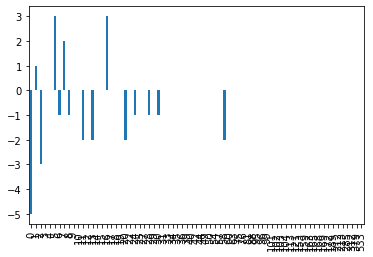

In [24]:
# plot frequency of features in each label in same plot
import matplotlib.pyplot as plt

(df_hashtags[1].value_counts().sort_index() - df_hashtags[0].value_counts().sort_index()).plot(kind='bar')

In [25]:
# save to csv without index
df_hashtags.to_csv('eda/per_user_stats/hashtags.csv', index=False)
df_urls.to_csv('eda/per_user_stats/urls.csv', index=False)
df_users.to_csv('eda/per_user_stats/users.csv', index=False)
df_rt.to_csv('eda/per_user_stats/rt.csv', index=False)
df_uppercase_chars.to_csv('eda/per_user_stats/uppercase_chars.csv', index=False)
df_min_chars.to_csv('eda/per_user_stats/min_chars.csv', index=False)
df_max_chars.to_csv('eda/per_user_stats/max_chars.csv', index=False)
df_chars.to_csv('eda/per_user_stats/chars.csv', index=False)
df_uppercase_words.to_csv('eda/per_user_stats/uppercase_words.csv', index=False)
df_min_words.to_csv('eda/per_user_stats/min_words.csv', index=False)
df_max_words.to_csv('eda/per_user_stats/max_words.csv', index=False)
df_words.to_csv('eda/per_user_stats/words.csv', index=False)
df_min_words_alt.to_csv('eda/per_user_stats/min_words_alt.csv', index=False)
df_max_words_alt.to_csv('eda/per_user_stats/max_words_alt.csv', index=False)
df_words_alt.to_csv('eda/per_user_stats/words_alt.csv', index=False)
df_stop_words.to_csv('eda/per_user_stats/stop_words.csv', index=False)
df_emojis.to_csv('eda/per_user_stats/emojis.csv', index=False)
df_sentiments_positive.to_csv('eda/per_user_stats/sentiments_positive.csv', index=False)
df_sentiments_negative.to_csv('eda/per_user_stats/sentiments_negative.csv', index=False)
df_sentiments_neutral.to_csv('eda/per_user_stats/sentiments_neutral.csv', index=False)
df_ner1_PERSON.to_csv('eda/per_user_stats/ner1_PERSON.csv', index=False)
df_ner1_ORG.to_csv('eda/per_user_stats/ner1_ORG.csv', index=False)
df_ner1_LOC.to_csv('eda/per_user_stats/ner1_LOCATION.csv', index=False)
df_ner1_MISC.to_csv('eda/per_user_stats/ner1_MISC.csv', index=False)
df_ner2_PER.to_csv('eda/per_user_stats/ner2_PER.csv', index=False)
df_ner2_ORG.to_csv('eda/per_user_stats/ner2_ORG.csv', index=False)
df_ner2_LOC.to_csv('eda/per_user_stats/ner2_LOC.csv', index=False)
df_ner2_MISC.to_csv('eda/per_user_stats/ner2_MISC.csv', index=False)

In [26]:
# save describe to csv with index
df_hashtags.describe().to_csv('eda/per_user_stats/describe/hashtags.csv', index=True)
df_urls.describe().to_csv('eda/per_user_stats/describe/urls.csv', index=True)
df_users.describe().to_csv('eda/per_user_stats/describe/users.csv', index=True)
df_rt.describe().to_csv('eda/per_user_stats/describe/rt.csv', index=True)
df_uppercase_chars.describe().to_csv('eda/per_user_stats/describe/uppercase_chars.csv', index=True)
df_min_chars.describe().to_csv('eda/per_user_stats/describe/min_chars.csv', index=True)
df_max_chars.describe().to_csv('eda/per_user_stats/describe/max_chars.csv', index=True)
df_chars.describe().to_csv('eda/per_user_stats/describe/chars.csv', index=True)
df_uppercase_words.describe().to_csv('eda/per_user_stats/describe/uppercase_words.csv', index=True)
df_min_words.describe().to_csv('eda/per_user_stats/describe/min_words.csv', index=True)
df_max_words.describe().to_csv('eda/per_user_stats/describe/max_words.csv', index=True)
df_words.describe().to_csv('eda/per_user_stats/describe/words.csv', index=True)
df_min_words_alt.describe().to_csv('eda/per_user_stats/describe/min_words_alt.csv', index=True)
df_max_words_alt.describe().to_csv('eda/per_user_stats/describe/max_words_alt.csv', index=True)
df_words_alt.describe().to_csv('eda/per_user_stats/describe/words_alt.csv', index=True)
df_stop_words.describe().to_csv('eda/per_user_stats/describe/stop_words.csv', index=True)
df_emojis.describe().to_csv('eda/per_user_stats/describe/emojis.csv', index=True)
df_sentiments_positive.describe().to_csv('eda/per_user_stats/describe/sentiments_positive.csv', index=True)
df_sentiments_negative.describe().to_csv('eda/per_user_stats/describe/sentiments_negative.csv', index=True)
df_sentiments_neutral.describe().to_csv('eda/per_user_stats/describe/sentiments_neutral.csv', index=True)
df_ner1_PERSON.describe().to_csv('eda/per_user_stats/describe/ner1_PERSON.csv', index=True)
df_ner1_ORG.describe().to_csv('eda/per_user_stats/describe/ner1_ORG.csv', index=True)
df_ner1_LOC.describe().to_csv('eda/per_user_stats/describe/ner1_LOCATION.csv', index=True)
df_ner1_MISC.describe().to_csv('eda/per_user_stats/describe/ner1_MISC.csv', index=True)
df_ner2_PER.describe().to_csv('eda/per_user_stats/describe/ner2_PER.csv', index=True)
df_ner2_ORG.describe().to_csv('eda/per_user_stats/describe/ner2_ORG.csv', index=True)
df_ner2_LOC.describe().to_csv('eda/per_user_stats/describe/ner2_LOC.csv', index=True)
df_ner2_MISC.describe().to_csv('eda/per_user_stats/describe/ner2_MISC.csv', index=True)

In [27]:
# create df for each label
for label in data.keys():
    pd.DataFrame(data={
        "hashtags": df_hashtags[label],
        "urls": df_urls[label],
        "users": df_users[label],
        "rt": df_rt[label],
        "uppercase_chars": df_uppercase_chars[label],
        "min_chars": df_min_chars[label],
        "max_chars": df_max_chars[label],
        "chars": df_chars[label],
        "uppercase_words": df_uppercase_words[label],
        "min_words": df_min_words[label],
        "max_words": df_max_words[label],
        "words": df_words[label],
        "min_words_alt": df_min_words_alt[label],
        "max_words_alt": df_max_words_alt[label],
        "words_alt": df_words_alt[label],
        "stop_words": df_stop_words[label],
        "emojis": df_emojis[label],
        "sentiments_positive": df_sentiments_positive[label],
        "sentiments_negative": df_sentiments_negative[label],
        "sentiments_neutral": df_sentiments_neutral[label],
        "ner1_PERSON": df_ner1_PERSON[label],
        "ner1_ORG": df_ner1_ORG[label],
        "ner1_LOC": df_ner1_LOC[label],
        "ner1_MISC": df_ner1_MISC[label],
        "ner2_PER": df_ner2_PER[label],
        "ner2_ORG": df_ner2_ORG[label],
        "ner2_LOC": df_ner2_LOC[label],
        "ner2_MISC": df_ner2_MISC[label]
    }).to_csv(f'eda/per_user_stats/combined/label_{label}.csv', index=True)

In [28]:
## NOT ALL #...# is followed by space
'''e.g.
		<document><![CDATA[There was a 5sos meet up in Belgium! #HASHTAG# #HASHTAG# #USER# 💗 💗 #URL# (#USER#_Daily ) -E]]></document>
'''

def count_max_words_alt_(data):
    # given data: {label: [[tweets]]
    # remove ##RT##
    # get total number of words for each label
    # output out: {label: count}
    out = {}
    for label, users in data.items():
        out[label] = 0
        for user in users:
            if sum([len(re.findall(r'#(URL|HASHTAG|USER)#\w', tweet)) for tweet in user]) > 0:
                print(user[0],label)
                print([re.findall(r'#(URL|HASHTAG|USER)#\w', tweet) for tweet in user])
                break
            out[label] += sum([len(re.findall(r'#(URL|HASHTAG|USER)#', tweet)) for tweet in user])
    return out

# count_max_words_alt_(data)